In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('house.csv')

In [3]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [6]:
data.isnull().sum() ## No null values present in the dataset

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [7]:
## Since describe() returns a Series with statistic names as the index, reset_index() converts it into a DataFrame where the statistic names become a separate column.
stats=data["Price"].describe().reset_index()
stats["Price"]=round(stats["Price"],2)
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [10]:
data.duplicated().sum()

0

In [11]:
import matplotlib.pyplot as plt

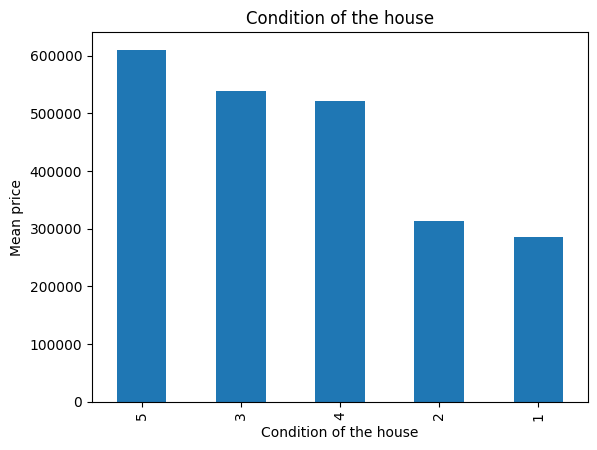

In [12]:
## 1. data.groupby("condition of the house")["Price"].mean()
##This groups the dataset by "condition of the house".
##It calculates the average (mean) Price for each condition.
##2. .sort_values(ascending=False)
##The results (mean price for each condition) are sorted in descending order, so the highest average price appears first.
##3. .plot(kind="bar")
##This plots the sorted data as a bar chart.
data.groupby("condition of the house")["Price"].mean().sort_values(ascending=False).plot(kind="bar")
plt.title("Condition of the house")
plt.xlabel("Condition of the house")
plt.ylabel("Mean price")
plt.show()

In [13]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [14]:
X=data[['number of bedrooms','number of bathrooms','living area','condition of the house','Number of schools nearby']]
Y=data[['Price']]

In [15]:
X

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [16]:
Y

,Price
0,1400000
1,1200000
2,838000
3,805000
4,790000
...,...
14614,221700
14615,219200
14616,209000
14617,205000


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #80-20 train-test

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.tree import DecisionTreeRegressor
param_grid={
    "criterion": ["mse","friedman_mse","mae"],
    "splitter":["best","random"],
    "max_depth":[None,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [20]:
tree_model=DecisionTreeRegressor()

In [23]:
grid_tree=GridSearchCV(estimator=tree_model,param_grid=param_grid)

In [24]:
grid_tree.fit(X_train,y_train)

C:\Users\Bhumika Shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhumika Shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhumika Shankar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Bhumika Shankar\AppData\Local\Programs\Pytho

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [27]:
tree_preds=grid_tree.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,tree_preds)

62953755232.69633

In [30]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
predslr=lr.predict(X_test)

In [34]:
mean_squared_error(y_test,predslr)

65918061852.34409

In [35]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel=RandomForestRegressor()

In [36]:
param_gridfr={
    "max_depth":[5,10,15],
    "n_estimators":[2,3,4,5,6,7,8,9,10]
}


In [38]:
gridfr=GridSearchCV(rfrmodel,param_gridfr)

In [40]:
gridfr.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [42]:
gridfr.best_params_

{'max_depth': 5, 'n_estimators': 10}

In [44]:
rfrpredictions=gridfr.predict(X_test)

In [47]:
mean_squared_error(y_test,rfrpredictions)

64140688142.03341

In [49]:
gridfr

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [50]:
import joblib
joblib.dump(gridfr,"model.pkl")

['model.pkl']

In [51]:
X.columns

Index(['number of bedrooms', 'number of bathrooms', 'living area',
       'condition of the house', 'Number of schools nearby'],
      dtype='object')